In [1]:
# Blind source separation using FastICA and PCA
# Author : Aleyna Kara
# This file is based on https://github.com/probml/pmtk3/blob/master/demos/icaDemo.m

from sklearn.decomposition import PCA, FastICA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

%matplotlib inline

try:
    from probml_utils import savefig, latexify, is_latexify_enabled
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify, is_latexify_enabled
import seaborn as sns

In [2]:
latexify(width_scale_factor=2, fig_height=1.5)

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


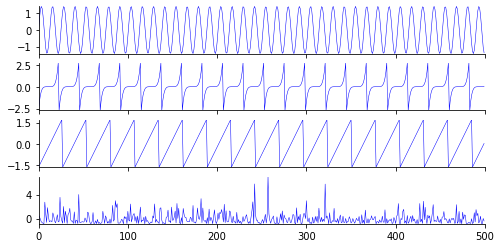

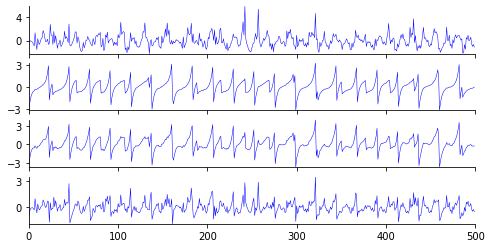

In [3]:
def plot_signals(signals, title, file_name):
    figsize = (8, 4)
    n_ticker = 2
    n_rows = signals.shape[0]
    if is_latexify_enabled():
        figsize = None
    fig, axs = plt.subplots(figsize=figsize, nrows=n_rows, sharex=True)
    axs = axs.flatten()
    for i, (signal, ax) in enumerate(zip(signals, axs)):
        ax.plot(signal, linewidth=0.5, color="b")
        ax.set_xlim([0, N])
        yticks = ticker.MaxNLocator(n_ticker)
        ax.yaxis.set_major_locator(yticks)
        ax.set_ylim([signal.min(), signal.max()])
        sns.despine()
    #     axs[0].set_title(title)
    savefig(f"{file_name}")
    plt.show()


# https://github.com/davidkun/FastICA/blob/master/demosig.m
def generate_signals():
    v = np.arange(0, 500)
    signals = np.zeros((n_signals, N))

    signals[0, :] = np.sin(v / 2)  # sinusoid
    signals[1, :] = ((v % 23 - 11) / 9) ** 5
    signals[2, :] = (v % 27 - 13) / 9  # sawtooth

    rand = np.random.rand(1, N)
    signals[3, :] = np.where(rand < 0.5, rand * 2 - 1, -1) * np.log(np.random.rand(1, N))  # impulsive noise

    signals /= signals.std(axis=1).reshape((-1, 1))
    signals -= signals.mean(axis=1).reshape((-1, 1))
    A = np.random.rand(n_signals, n_signals)  # mixing matrix
    return signals, A @ signals


np.random.seed(0)
n_signals, N = 4, 500
signals, mixed_signals = generate_signals()

plot_signals(signals, "Truth", "ica-truth")

plot_signals(mixed_signals, "Observed Signals", "ica-obs")

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


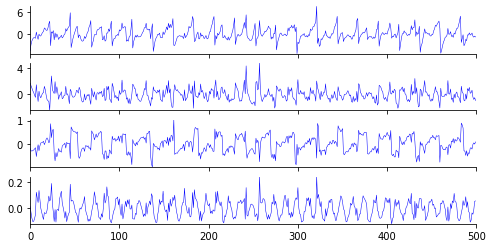

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


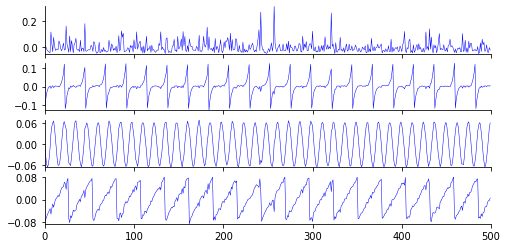

In [4]:
# PCA Estimate
pca = PCA(n_components=4)
signals_pca = pca.fit(mixed_signals.T).transform(mixed_signals.T)

plot_signals(signals_pca.T, "PCA estimate", "ica-pca")

# ICA Estimate
ica = FastICA(algorithm="deflation", fun="cube", n_components=4)
signals_ica = ica.fit(mixed_signals.T).transform(mixed_signals.T)

plot_signals(signals_ica.T, "ICA estimate", "ica-ica")